<h2  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">MNIST DIGIT RECOGNITION </h2><a id = "1" ></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='color:white; background:#0096FF ; border:0' role="tab" aria-controls="home"><center>Quick Navigation</center></h3>

* [Importing Libraries](#1.1)
    
* [Data Preprocessing](#2)
    
    - [Load Training Dataset](#2.1)
    
    - [Split Data](#2.2)
    
    - [Image Preprocessing](#2.3)
    
* [Data Visualization](#3)

* [Activation function](#4)

* [Model Summary](#5)

* [Baseline Architecture](#5.3)  
    
* 👆[**Resnet Architecture**](#5.4)    

* [Data Augmentation](#6)
    
* [Save and Load Model](#6.2)
    
* [Plot Accuracy and Loss curve](#7)
    
* [Evaluation](#8)

**Objective**
* To recognize digits from the MNIST dataset.

<h1  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">1. IMPORTING LIBRARIES</h1><a id = "1.1" ></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import decomposition

import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Activation,Flatten, Conv2D, Dropout
from tensorflow.keras.layers import MaxPool2D, LSTM, BatchNormalization,concatenate
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.layers import ELU
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
from tensorflow.keras import Model
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/character/Train.csv
/kaggle/input/character/Test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


<h1 style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">2. DATA PREPROCESSING</h1><a id = "2" ></a>

<h2  style='color:#0096FF; background:white ; border:0' class="list-group-item list-group-item-action active">2.1 LOAD TRAINING DATASET</h2><a id = "2.1" ></a>

In [4]:
loc = '../input/character'
train_data = pd.read_csv(loc+'/Train.csv')

In [5]:
test_file = loc+"/Test.csv"
test_data = pd.read_csv(test_file)

<h3  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">Data Dimension</h3>

In [6]:
print(f"train.csv size is {train_data.shape}")
print(f"test.csv size is {test_data.shape}")

train.csv size is (209966, 785)
test.csv size is (34966, 784)


In [7]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.00000,...,209966.00000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000,209966.000000
mean,16.999919,0.018417,0.014988,0.015369,0.015845,0.017536,0.020813,0.030957,0.031591,0.18181,...,0.29872,0.244111,0.180834,0.131097,0.104465,0.073721,0.028852,0.016436,0.009506,0.006534
std,10.099573,0.834946,0.263604,0.317467,0.425064,0.510315,0.920157,1.481729,1.554027,2.00597,...,6.37452,5.617072,4.624211,3.598397,2.997498,2.256605,1.802888,1.281223,0.915430,0.547347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.000000,148.000000,66.000000,78.000000,126.000000,139.000000,243.000000,232.000000,231.000000,219.00000,...,255.00000,255.000000,255.000000,253.000000,243.000000,232.000000,229.000000,200.000000,189.000000,129.000000


**To Check how many pixel columns are there such that all their values are zero as we can see from the describe() function.**

In [9]:
df = train_data.drop(columns=['label'])
lst,ind = [],[]
for feature in df.columns:
    l = len(df.loc[df[feature] ==0])
    lst.append(l)
# 209966 is the number of datapoints of training dataset.
lst.count(209966)

0

**Observation**:
* There are 76 pixel columns among the 784 columns , 209966 datapoints whose all values are 0. 
* For sake of dimensionality reduction, these features can be removed.

<h3  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">Missing values</h3>

In [10]:
train_data.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

* No missing values

In [11]:
train_labels=train_data['label']

<h2  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">2.2 SPLIT DATA</h2><a id = "2.2" ></a>

In [12]:
img_rows, img_cols = 28, 28 # 28*28 dimension of image reshape
num_classes = 35 # 35 number of labels

<h2  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">2.3 PREPROCESSING</h2><a id = "2.3" ></a>

<h3  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">One hot Encoding</h3>

One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.

In [13]:
def data_prep(raw):
    out_y = tensorflow.keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    # normalization
    out_x = x_shaped_array / 255
    return out_x, out_y

x, y = data_prep(train_data)

<h3  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">Data Split</h3>

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)#ratio 90:10
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size = 1/9, random_state=42)

* Splitting data into 90% training and 10% test data.
* Splitting the training data into 90% training data and 10% validation data

<h3  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">Reshaping the Data to 4 dimension</h3>

In [15]:
# Normalization
test_data = test_data / 255  
# reshaping
test_data = test_data.values.reshape(-1,28,28,1)
test_data.shape

(34966, 28, 28, 1)

<h3  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">Data Dimension</h3>

In [16]:
print(f"Training data size is {x_train.shape}")
print(f"Training data size is {y_train.shape}")
print(f"Testing data size is {x_test.shape}")
print(f"Training data size is {y_test.shape}")

Training data size is (167972, 28, 28, 1)
Training data size is (167972, 35)
Testing data size is (20997, 28, 28, 1)
Training data size is (20997, 35)


<h1  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">3. VISUALIZE DATA</h1><a id = "3" ></a>

In [17]:
title=[j for i in range(10, 19) for j in range(0,10) if y_train[i][j] == 1]
title

[5, 6]

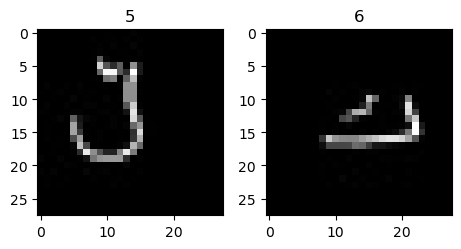

In [20]:
plt.figure(figsize=(7,9))
j = 3
for i in range(1, 3):
    plt.subplot(330 + i)
    plt.imshow(x_train[j], cmap=plt.get_cmap('gray'))
    plt.title(title[i-1])
    j+=1
    
plt.tight_layout()

[6000, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999, 5999]


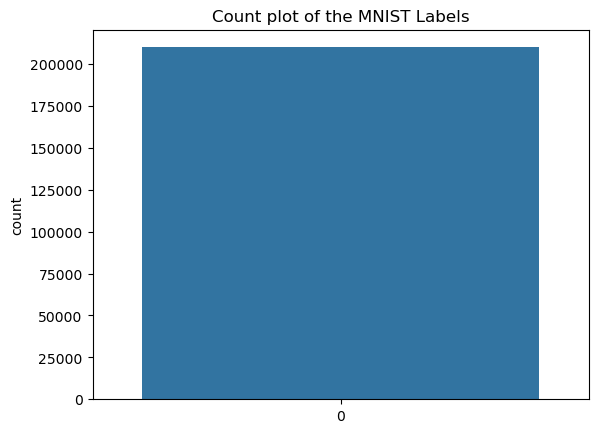

In [21]:
sns.countplot(train_labels)
plt.title('Count plot of the MNIST Labels')
print(list(train_data.label.value_counts().sort_index()))

* From the above countplot label 1 is data point highest in number at 4684 points, label 5 is least with 3795 data points. 

<h1  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">4. ACTIVATION FUNCTION</h1><a id = "4" ></a>


- **LeakyReLu**

In [22]:
alpha = 0.01
def LeakyReLu(z,alpha):
    if z >= 0:
        return z
    else :
        return alpha*z

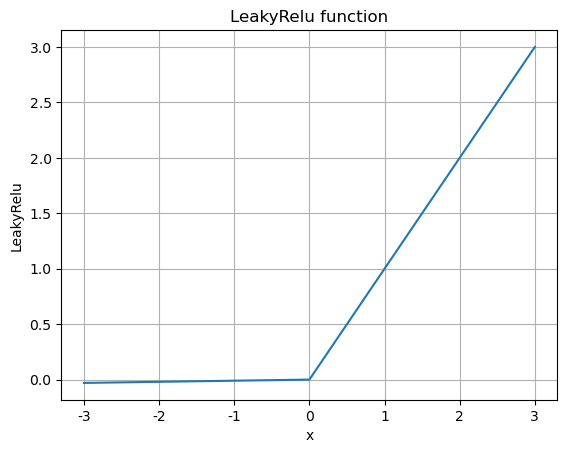

In [23]:
leakyrelu = tensorflow.keras.layers.LeakyReLU(alpha=0.01)
x = np.arange(-3,4)
pd.Series(leakyrelu(x)).plot(kind='line')
plt.title('LeakyRelu function')
plt.xticks(range(len(x)),x)
plt.ylabel('LeakyRelu')
plt.xlabel('x')
plt.grid('on')
plt.show()

**Note**
* LeakyRelu is linear in the positive x axis and goes close to x axis when x<0 but does not touch x axis

* **Swish** <br>
Mathematical formula <br>
Y = X * sigmoid(X)
  = X /(1 + e^-X)
 

[-2.68280104e-03 -6.37735836e-03 -1.48357389e-02 -3.34642546e-02
 -7.19448398e-02 -1.42277620e-01 -2.38405844e-01 -2.68941421e-01
  0.00000000e+00  7.31058579e-01  1.76159416e+00  2.85772238e+00
  3.92805516e+00]


<function matplotlib.pyplot.show(close=None, block=None)>

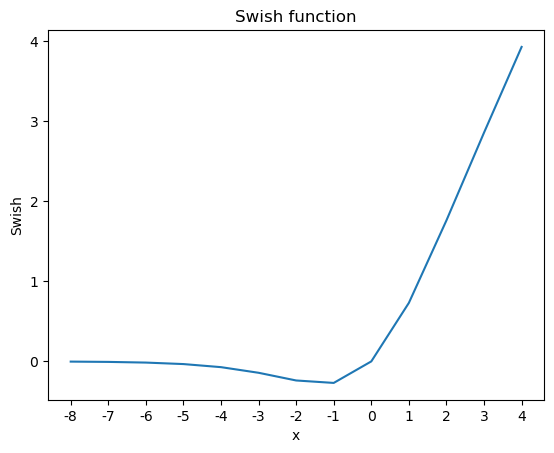

In [24]:
x = np.arange(-8,5)
swish = x/(1+np.exp(-x))
print(swish)
pd.Series(swish).plot(kind='line')
plt.title('Swish function')
plt.xticks(range(len(x)),x)
plt.ylabel('Swish')
plt.xlabel('x')
plt.show

**Note**
* Swish function is approximately similar to Relu when x>0, when x<0 the values change.
* Swish algorithm looks similar to the ReLu function in the positive x axis.
 
 For more details of ["Why Swish is better than ReLu"](https://github.com/christianversloot/machine-learning-articles/blob/main/why-swish-could-perform-better-than-relu.md)

<h2  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">5. MODEL SUMMARY</h2><a id = "5" ></a>

<h2  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">Model</h2><a id = "5.3" ></a>

### Baseline Architecture
* activation = 'leakyrelu'

In [25]:
model = Sequential()

model.add(Conv2D(64, kernel_size=3, padding='same',  activation = leakyrelu,input_shape=(img_rows, img_cols, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, padding = 'same', activation = leakyrelu))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size=3, padding = 'same',activation = leakyrelu))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, padding = 'same',activation = leakyrelu))

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, padding = 'same',activation = leakyrelu))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(256,activation='swish'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Metrics of above model
# Model Accuracy = 0.99564 for activation = leakyrelu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

# <h1  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">Resnet19 -> skip-connection architecture</h1><a id = "5.4" ></a> 

In [26]:
def conv_layer(input,filter=64):
    conv_1 = Conv2D(filter, kernel_size=3, padding='same',activation = 'selu',kernel_initializer = 'he_normal')(input)
    bn     = BatchNormalization()(conv_1)
    conv_2 = Conv2D(filter, kernel_size=3, padding='same',kernel_initializer = 'he_normal')(bn)
    bn     = BatchNormalization()(conv_2)
    act    = Activation('selu')(bn)
    return act

In [27]:
def build_model():
    input  = Input((img_rows,img_cols,1))
    conv_1 = conv_layer(input,filter=64)
    conv_2 = conv_layer(conv_1,filter=64)
    
    merge1 = concatenate([conv_1,conv_2], axis = 3)
    #pool = MaxPool2D((2,2))(merge1)
    
    conv_3 = conv_layer(merge1,filter=128)
    conv_4 = conv_layer(conv_3,filter=128)
    merge2 = concatenate([conv_3,conv_4], axis = 3)
    #pool = MaxPool2D((2,2))(merge2)
    
    dense  = Flatten()(merge2)
    dense  = Dense(256,activation='selu')(dense)
    drop   = Dropout(0.2)(dense)
    output = Dense(num_classes, activation='softmax')(drop)    

    model = Model(inputs=[input],outputs = [output])
    return model

model = build_model()

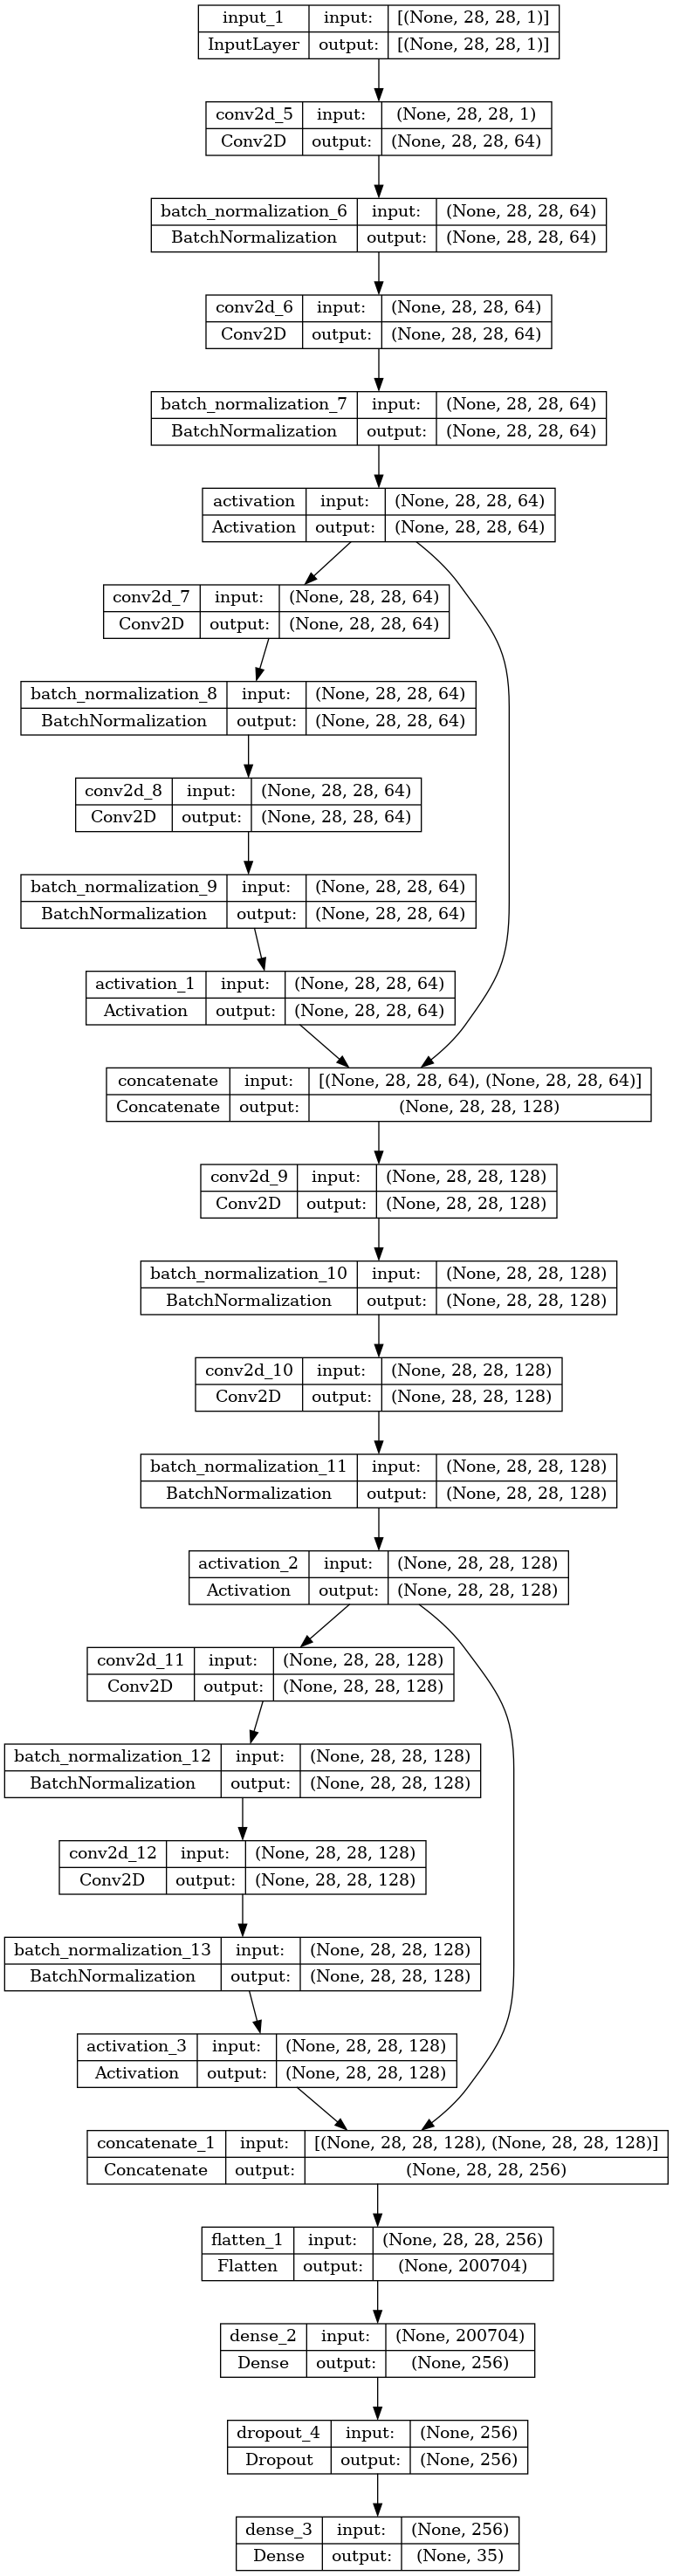

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image("model.png")

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 64)   640         ['input_1[0][0]']                
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 28, 28, 64)  256         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 64)   36928       ['batch_normalization_6[0][0]

<h1  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">6. DATA AUGMENTATION</h1><a id = "6" ></a>

One way to avoid overfitting and improve the accuracy is to increase the variability of existing samples. Which is also helps to compensate lack of data. Data augmentation generates data from existing samples by applying various transformations to the original dataset. This method aims to increase the number of unique input samples, which, in turn, will allow the model to show better accuracy on the validation dataset.

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
# use data augmentation to improve accuracy and prevent overfitting
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False) 

train_generator = augs_gen.flow(x_train, y_train, batch_size=300)

<h2  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active"> CallBacks</h2><a id = "6.1" ></a>

<h2  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">6.1 EarlyStopping</h2><a id = "6.1" ></a>

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=8, mode='auto', restore_best_weights=True)

<h2  style='color:#0096FF; background:#FFF ' class="list-group-item list-group-item-action active">6.2 Learning Rate Reduction</h2><a id = "6.2" ></a>

In [34]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',patience=4, verbose=1,  factor=0.6, min_lr=0.0001)

In [35]:
model_checkpoint = ModelCheckpoint('model.hdf5', verbose=1,monitor='val_loss',save_best_only=True)

In [36]:
epochs = 30
callbacks = [model_checkpoint,lr_reduction,early_stop]

In [37]:
model.compile(optimizer = 'adam',loss = categorical_crossentropy ,metrics=['accuracy'])
model_fit = model.fit(train_generator, epochs=epochs, batch_size =300 ,validation_data=(x_val, y_val), verbose =1,callbacks=callbacks)

Epoch 1/30
560/560 [==============================] - ETA: 0s - loss: 4.5289 - accuracy: 0.0324
Epoch 1: val_loss improved from inf to 3.50400, saving model to model.hdf5
560/560 [==============================] - 93s 145ms/step - loss: 4.5289 - accuracy: 0.0324 - val_loss: 3.5040 - val_accuracy: 0.0534 - lr: 0.0010
Epoch 2/30
560/560 [==============================] - ETA: 0s - loss: 3.2983 - accuracy: 0.1098
Epoch 2: val_loss improved from 3.50400 to 2.34258, saving model to model.hdf5
560/560 [==============================] - 80s 144ms/step - loss: 3.2983 - accuracy: 0.1098 - val_loss: 2.3426 - val_accuracy: 0.3017 - lr: 0.0010
Epoch 3/30
560/560 [==============================] - ETA: 0s - loss: 1.9001 - accuracy: 0.4104
Epoch 3: val_loss improved from 2.34258 to 0.94631, saving model to model.hdf5
560/560 [==============================] - 78s 140ms/step - loss: 1.9001 - accuracy: 0.4104 - val_loss: 0.9463 - val_accuracy: 0.7073 - lr: 0.0010
Epoch 4/30
560/560 [==================

<h2  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">SAVE MODEL</h2><a id = "6.2" ></a>

In [38]:
!mkdir -p saved_model
model.save('saved_model/model.json')

In [39]:
model.load_weights('model.hdf5')
load_model = model

<h2  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">7. PLOT ACCURACY AND LOSS CURVE</h2><a id = "7" ></a>

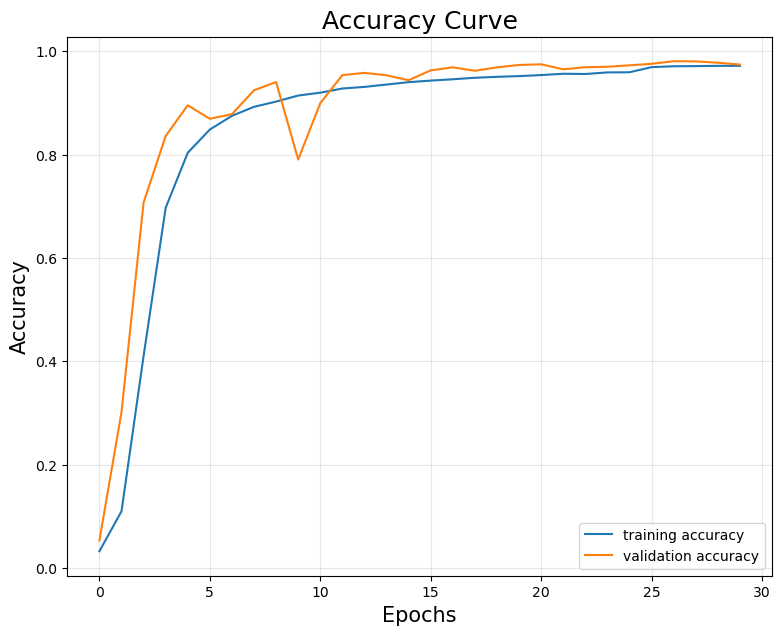

In [40]:
# Defining Figure
f = plt.figure(figsize=(20,7))

#For Accuracy - subplot
f.add_subplot(121)

plt.plot(model_fit.epoch,model_fit.history['accuracy'],label = "training accuracy") # Accuracy curve for training set
plt.plot(model_fit.epoch,model_fit.history['val_accuracy'],label = "validation accuracy")

plt.title("Accuracy Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

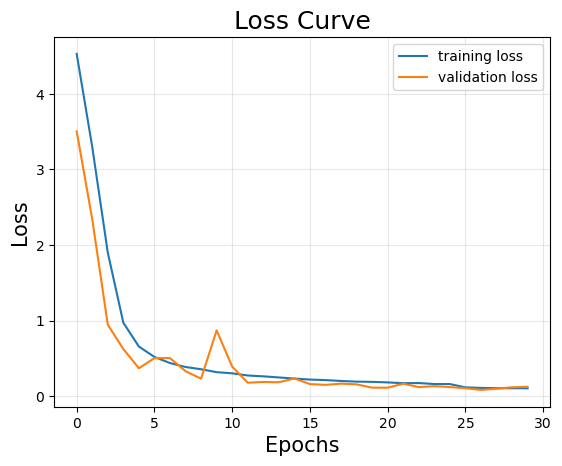

In [41]:
#Adding Subplot (For Loss)
f.add_subplot(122)

plt.plot(model_fit.epoch,model_fit.history['loss'],label="training loss") # Loss curve for training set
plt.plot(model_fit.epoch,model_fit.history['val_loss'],label="validation loss")

plt.title("Loss Curve",fontsize=18)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


<h1  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">8. EVALUATION</h1><a id = "8" ></a>

In [42]:
evaluate_test = model.evaluate(x_test, y_test, verbose=1)

print("\nAccuracy =", "{:.7f}%".format(evaluate_test[1]*100))
print("Loss     =" ,"{:.9f}".format(evaluate_test[0]))

657/657 [==============================] - 5s 8ms/step - loss: 0.0776 - accuracy: 0.9815

Accuracy = 98.1521189%
Loss     = 0.077588171


In [43]:
y_predict = model.predict(x_test)

657/657 [==============================] - 4s 6ms/step


In [44]:
y_predict_max = np.argmax(y_predict,axis=1) 
y_predict_max

array([21, 28, 12, ..., 25, 15,  3])


<h2  style='color:white; background:#0096FF ; border:0;text-align: center' class="list-group-item list-group-item-action active">8.1 SUBMISSION</h2><a id = "8.1" ></a>

In [45]:
submission_label = np.argmax(model.predict(test_data), axis=1)
submission_label = pd.Series(submission_label, name="Label")

image_id = pd.Series(range(1,len(test_data)+1))
image_id = pd.Series(image_id, name="ImageId")

1093/1093 [==============================] - 6s 6ms/step


In [46]:
submission = pd.concat([image_id,submission_label],axis = 1)
submission.to_csv("submission.csv", index=False)
pd.read_csv("submission.csv").head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


##### If you like my work, please don't forget to upvote. Thank you - `@tejasurya`